# 'Segmentación' de una imagen en el espacio de color

La aproximación que hemos usado hasta ahora para presentar DBSCAN se ha basado en ejemplos donde el concepto de 'localidad' venia dado por la contiguidad espacial. En este ejercicio vamos a usar DBSCAN en el espacio de características del color y vamos a usar DBSCAN para agrupar píxeles de una imágen que tienen color parecido (dependerá del parámetro Epsilon que elijas).

La segmentación de una imagen en el campo de la visión por computador, consiste en la identificación de objetos diferentes en la misma. Formalmente esto se hace generalmente usando operaciones sobre pixel (detección de bordes, regiones,...). Nosotros vamos a utilizar DBSCAN para agrupar en el espacio de colores de la imagen  los pixeles que tengan colores muy parecidos. No es una verdadera segmentación, pero es una aproximación al problema de la detección de regiones de la imagen que representan objetos diferentes (dejando a un lado el problema de las sombras, reflejos etc)

### Paso 1. Carga de la imagen
Carga la imagen 'mercado.jpg' utilizando la libreria de Python cv2 y escálala al 50% ya que es un poco grande para el procesamiento de DBSCAN.Para ello usa cv2.resize().
Comprueba quie todo ha ido bien escribiendo la imagen escalada usando cv2.imwrite() y visualizándola a su vez con Image(filename=??)
La imagen se carga en RGB, cada pixel tiene 3 valores en un rango [0,255] que representa su color.

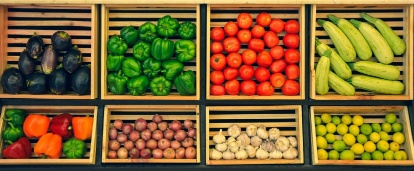

In [190]:
import cv2 #EDIT, this line added
from IPython.display import Image

import numpy as np
from sklearn.cluster import DBSCAN

src = cv2.imread('mercado.jpg', cv2.IMREAD_UNCHANGED)
src.shape
 
#Porcentaje en el que se redimensiona la imagen
scale_percent = 50
 
#calcular el 50 por ciento de las dimensiones originales usando los datos de src.shape
width = int((src.shape[1])*scale_percent/100)
height = int((src.shape[0])*scale_percent/100)
 
# dsize
dsize = (width, height)
 
# cambiar el tamaño de la imagen
output = cv2.resize(src, dsize)
#output = src
 
cv2.imwrite('mercado_half.jpg',output) 

Image(filename='mercado_half.jpg') 

### Paso 2 Cambio de formato de la imagen
La imagen esta en memoria como una matriz de pixeles de 3 componentes, pero DBSCAN procesa vectores de datos, así que vamos a cambiar el formato por un vector de componentes de color. Es decir vamos a cambiar de una matriz de dimensiones (n,m,3) a un vector de dimensiones (n*m,3)

In [169]:
#Comprobamos la talla de nuestra imagen
print(output.shape)
sh = output.shape
#print(output)
#print(sh[0],sh[1])

#Reformateamos la imagen 'output' usando np.reshape a (sh[0]*sh[1],3)
output_std = np.reshape(output, (sh[0]*sh[1],3))
print("*******")

#debe dar (70794,3)
print(output_std.shape)

(171, 414, 3)
*******
(70794, 3)


### Paso 3. Aplicamos DBSCAN
Como sabemos, DBSCAN es muy sensible a los parámetros **eps y MinPts**. Una variación de 1 unidad en 'eps' puede representar un cambio de un resultado aceptable a un mal resultado o viceversa. Estudia el resultado de DBSCAN para un rango **eps [2,6]** aumentando de 1 en 1 y para un **MinPts [10, 20]**  aumentando de 1 en 1. Como no puedes comparar con una solucion, una forma de ver si el resultado puede ser bueno es observar el número de etiquetas que genera DBSCAN (número de clusters) y la cantidad de píxeles que  contiene cada cluster (tamaño).
Como indicación en nuestra experiencia con esta imagen, una buena indicación es:
-obtener más de 100 clusters
-el cluster etiquetado como -1 (ruido) tiene menos del 50% de los datos

In [170]:
# Define max_distance (eps parameter in DBSCAN())
max_distance = 2
MinPts = 10

db = DBSCAN(eps=max_distance, min_samples=MinPts).fit(output_std)
db.fit(output_std)

# Extract labels (-1 is used for outliers)
labels = db.labels_

Con la información que te proporciona la caja siguiente, puedes juzgar si el resultado será bueno atendiendo al número de grupos formados y a la cantidad de pixeles que tiene cada grupo. No hay un resultado claramente mejor aunque sí muchos mejores que otros. Piensa que estás clusterizando por  color de pixel, no por contiguidad espacial de pixels.

In [171]:
#Analizamos el número de clusters y su tamaño
print(db.n_features_in_)
unique, counts = np.unique(labels, return_counts=True)
print(unique)
print(counts)

3
[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214]
[50877    16    36  1194     9  1035    14    36    11    13    10    20
    30     7    10    25   154    19    16    19

Preparamos ahora una paleta de colores para pintar cada pixel con un color según su pertenencia a un cluster.

[(0.6280661284121491, 0.013302575932333718, 0.26082276047673975), (0.6365244136870435, 0.022683583237216455, 0.26282199154171476), (0.6449826989619377, 0.03206459054209919, 0.2648212226066898), (0.6534409842368321, 0.04144559784698193, 0.2668204536716648), (0.6618992695117263, 0.050826605151864664, 0.26881968473663975), (0.6788158400615149, 0.06958861976163014, 0.2728181468665898), (0.6872741253364091, 0.07896962706651288, 0.2748173779315648), (0.6957324106113034, 0.08835063437139562, 0.2768166089965398), (0.7041906958861976, 0.09773164167627835, 0.27881584006151483), (0.7126489811610919, 0.10711264898116109, 0.28081507112648985), (0.7211072664359862, 0.11649365628604381, 0.28281430219146486), (0.7380238369857748, 0.1352556708958093, 0.28681276432141484), (0.746482122260669, 0.14463667820069204, 0.28881199538638985), (0.7549404075355632, 0.15401768550557476, 0.29081122645136487), (0.7633986928104575, 0.1633986928104575, 0.2928104575163399), (0.7718569780853518, 0.17277970011534027, 0.2

Text(0.5, 1.0, 'Reversed Inferno Palette 7 Colors')

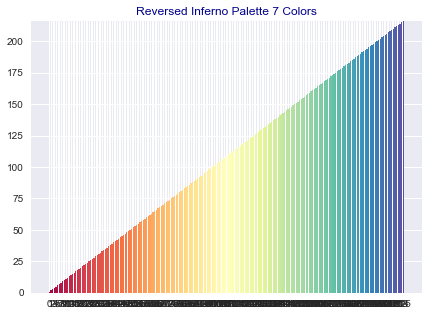

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

lst = unique

fig = plt.figure(figsize=(7,5))
axes = fig.add_subplot(1,1,1)
axes.set_ylim(0, len(lst))
plt.style.use("seaborn")


lst = [x+2 for x in lst]
palette = sns.color_palette("Spectral",len(lst))
#palette = sns.color_palette("inferno_r", 7)

print(palette)
plt.bar(range(len(lst)), sorted(lst), color=palette)
#tick_lst=["one", "two", "three", "four", "five", "six", "seven"]
plt.xticks(np.arange(len(lst)))
plt.title("Reversed Inferno Palette 7 Colors", color="darkblue")

EL código de la caja siguiente pretende evitar que clusters muy grandes tengan colores muy parecidos.
Observando el vector de clusters con su tamaño, que has calculado anteriormente, podrás  darte cuenta de que muchas veces aparecen clusteres muy grandes juntos al principio (tipicamente el cluster de etiqueta -1 que corresponde al ruido y algun cluster entre la etiqueta 0 y 10). Como las etiquetas tambien representan entradas a la paleta de colores, etiquetas muy próximas tambien tienen colores muy proximos.
Esto hace que sea difícil identificar los diferentes grupos grandes. Para evitar esto, vamos a intercambiar las etiquetas de al menos el grupo de ruido y otro grupo que consideres cercano al mismo, intercambiando las etiquetas con otros grupos con etiquetas del final (ej. intercambiamos las etiquetas -1 con otra etiqueta del final que tenga pocos pixeles) e intercambiamos el otro grupo grande cercano a -1 con una etiqueta de un grupo pequeño del medio del vector de etiquetas.

In [205]:
#Intercambio de algunas etiquetas por parte de los pixeles
for j in range(0,sh[0]*sh[1]):
    aux = labels[j]
    
    #elijo un grupo próximo a la etiqueta '-1' que sea muy grande y lo mando a otra region de color
    if labels[j] == 0:
        aux = 35
    if labels[j] == 35:
        aux = 0
    #elijo la etiqueta de ruido (-1) y la intercambio con otra del final de la paleta
    if labels[j] == -1:
        aux = 75
    if labels[j] == 75:
        aux = -1
    
    labels[j] = aux

Ahora reescribimos los colores de los pixeles de la imagen con los colores de la paleta siguiendo los valores de la etiquetas (es decir, pintamos cada pixel con el color asociado a la etiqueta de dicho pixel)

In [174]:
for i in range(0,sh[0]*sh[1]): 
    output_std[i,0] = round((np.array(palette[labels[i]+1])[0]) * 255.0)
    output_std[i,1] = round((np.array(palette[labels[i]+1])[1]) * 255.0)
    output_std[i,2] = round((np.array(palette[labels[i]+1])[2]) * 255.0)

Reescalamos el vector de píxeles para que vuelva a ser una matriz de pixeles (formato original de la imagen).
Y escribimos la imagen procesada en un fichero para su visualizacion.

(171, 414, 3)


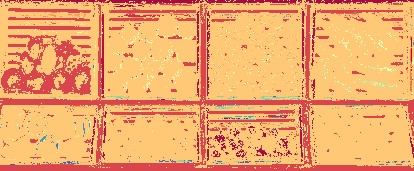

In [175]:
output_newshape = np.resize(output_std, sh)
print(output_newshape.shape)

cv2.imwrite('mercado_segmentado.jpg',cv2.cvtColor(output_newshape, cv2.COLOR_RGB2BGR)) 


Image(filename='mercado_segmentado.jpg') 

eps = 4; MinPts = 15

In [176]:
src = cv2.imread('mercado.jpg', cv2.IMREAD_UNCHANGED)
src.shape
 
#Porcentaje en el que se redimensiona la imagen
scale_percent = 50
 
#calcular el 50 por ciento de las dimensiones originales usando los datos de src.shape
width = int((src.shape[1])*scale_percent/100)
height = int((src.shape[0])*scale_percent/100)
 
# dsize
dsize = (width, height)
 
# cambiar el tamaño de la imagen
output = cv2.resize(src, dsize)
#output = src
 
cv2.imwrite('mercado_half.jpg',output) 

Image(filename='mercado_half.jpg') 

#Comprobamos la talla de nuestra imagen
print(output.shape)
sh = output.shape
#print(output)
#print(sh[0],sh[1])

#Reformateamos la imagen 'output' usando np.reshape a (sh[0]*sh[1],3)
output_std = np.reshape(output, (sh[0]*sh[1],3))
print("*******")

#debe dar (70794,3)
print(output_std.shape)

(171, 414, 3)
*******
(70794, 3)


In [177]:
# Define max_distance (eps parameter in DBSCAN())
max_distance = 4
MinPts = 15

db2 = DBSCAN(eps=max_distance, min_samples=MinPts).fit(output_std)
db2.fit(output_std)

# Extract labels (-1 is used for outliers)
labels = db2.labels_

In [178]:
#Analizamos el número de clusters y su tamaño
print(db2.n_features_in_)
unique, counts = np.unique(labels, return_counts=True)
print(unique)
print(counts)

3
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79]
[21346 38597   112    15    17    15    38    36    19    31    12  4433
    32    26    70   146  3054    47    19    34   493    18    34    80
    35    11    16    15     8    15    29    17    17    15    47    14
    21    31    42    23   917    27    22    34    13    15    12     8
    26    15    41    23    30    16    15    24    15    15    14    14
    16    26    15    17    34    47    19    16    22    14    23    22
    31    16    13    15    14    15    17    12    14]


[(0.6449826989619377, 0.03206459054209919, 0.2648212226066898), (0.6703575547866205, 0.0602076124567474, 0.27081891580161477), (0.6957324106113034, 0.08835063437139562, 0.2768166089965398), (0.7211072664359862, 0.11649365628604381, 0.28281430219146486), (0.746482122260669, 0.14463667820069204, 0.28881199538638985), (0.7718569780853518, 0.17277970011534027, 0.2948096885813149), (0.7972318339100346, 0.20092272202998845, 0.3008073817762399), (0.8226066897347175, 0.22906574394463664, 0.30680507497116494), (0.8472126105344099, 0.2612072279892349, 0.30519031141868513), (0.8615148019992311, 0.28289119569396387, 0.2996539792387543), (0.8758169934640523, 0.3045751633986928, 0.29411764705882354), (0.8901191849288735, 0.3262591311034217, 0.28858131487889277), (0.9044213763936948, 0.34794309880815066, 0.28304498269896194), (0.9187235678585159, 0.3696270665128797, 0.2775086505190312), (0.9330257593233372, 0.3913110342176086, 0.27197231833910035), (0.9473279507881585, 0.4129950019223375, 0.266435986

Text(0.5, 1.0, 'Reversed Inferno Palette 7 Colors')

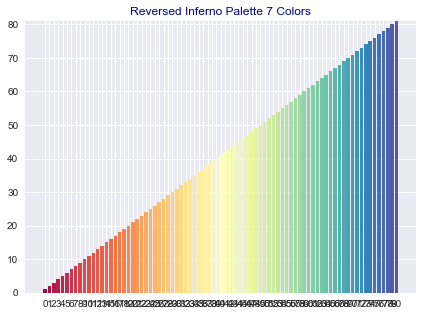

In [179]:
lst = unique

fig = plt.figure(figsize=(7,5))
axes = fig.add_subplot(1,1,1)
axes.set_ylim(0, len(lst))
plt.style.use("seaborn")


lst = [x+2 for x in lst]
palette = sns.color_palette("Spectral",len(lst))
#palette = sns.color_palette("inferno_r", 7)

print(palette)
plt.bar(range(len(lst)), sorted(lst), color=palette)
#tick_lst=["one", "two", "three", "four", "five", "six", "seven"]
plt.xticks(np.arange(len(lst)))
plt.title("Reversed Inferno Palette 7 Colors", color="darkblue")

In [180]:
#Intercambio de algunas etiquetas por parte de los pixeles
for j in range(0,sh[0]*sh[1]):
    aux = labels[j]
    
    #elijo un grupo próximo a la etiqueta '-1' que sea muy grande y lo mando a otra region de color
    if labels[j] == 0:
        aux = 35
    if labels[j] == 35:
        aux = 0
    #elijo la etiqueta de ruido (-1) y la intercambio con otra del final de la paleta
    if labels[j] == -1:
        aux = 75
    if labels[j] == 75:
        aux = -1
    
    labels[j] = aux

In [181]:
for i in range(0,sh[0]*sh[1]): 
    output_std[i,0] = round((np.array(palette[labels[i]+1])[0]) * 255.0)
    output_std[i,1] = round((np.array(palette[labels[i]+1])[1]) * 255.0)
    output_std[i,2] = round((np.array(palette[labels[i]+1])[2]) * 255.0)

(171, 414, 3)


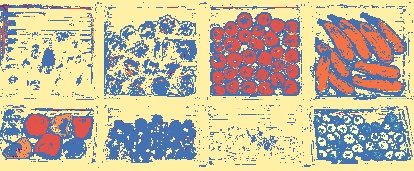

In [182]:
output_newshape = np.resize(output_std, sh)
print(output_newshape.shape)

cv2.imwrite('mercado_segmentado.jpg',cv2.cvtColor(output_newshape, cv2.COLOR_RGB2BGR)) 


Image(filename='mercado_segmentado.jpg') 

In [183]:
src = cv2.imread('mercado.jpg', cv2.IMREAD_UNCHANGED)
src.shape
 
#Porcentaje en el que se redimensiona la imagen
scale_percent = 50
 
#calcular el 50 por ciento de las dimensiones originales usando los datos de src.shape
width = int((src.shape[1])*scale_percent/100)
height = int((src.shape[0])*scale_percent/100)
 
# dsize
dsize = (width, height)
 
# cambiar el tamaño de la imagen
output = cv2.resize(src, dsize)
#output = src
 
cv2.imwrite('mercado_half.jpg',output) 

Image(filename='mercado_half.jpg') 

#Comprobamos la talla de nuestra imagen
print(output.shape)
sh = output.shape
#print(output)
#print(sh[0],sh[1])

#Reformateamos la imagen 'output' usando np.reshape a (sh[0]*sh[1],3)
output_std = np.reshape(output, (sh[0]*sh[1],3))
print("*******")

#debe dar (70794,3)
print(output_std.shape)

(171, 414, 3)
*******
(70794, 3)


In [184]:
# Define max_distance (eps parameter in DBSCAN())
max_distance = 2
MinPts = 20

db2 = DBSCAN(eps=max_distance, min_samples=MinPts).fit(output_std)
db2.fit(output_std)

# Extract labels (-1 is used for outliers)
labels = db2.labels_

In [185]:
#Analizamos el número de clusters y su tamaño
print(db2.n_features_in_)
unique, counts = np.unique(labels, return_counts=True)
print(unique)
print(counts)

3
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27]
[59124    62    17   175    82    17   111   571  9974    84    25    26
    16    21    65    33   110    14    22    16    22    19    25    22
    31    51    20    17    22]


[(0.6872741253364091, 0.07896962706651288, 0.2748173779315648), (0.7633986928104575, 0.1633986928104575, 0.2928104575163399), (0.8310649750096117, 0.23844675124951936, 0.30880430603613995), (0.8758169934640523, 0.3045751633986928, 0.29411764705882354), (0.9139561707035756, 0.36239907727797, 0.27935409457900806), (0.9568627450980393, 0.42745098039215684, 0.2627450980392157), (0.9679354094579008, 0.5074202229911572, 0.2996539792387543), (0.9803921568627452, 0.5973856209150326, 0.34117647058823525), (0.9914648212226067, 0.677354863514033, 0.37808535178777386), (0.9934640522875817, 0.7477124183006535, 0.4352941176470587), (0.9946943483275663, 0.8092272202998846, 0.48696655132641287), (0.996078431372549, 0.8784313725490196, 0.5450980392156862), (0.9973087274125336, 0.9165705497885429, 0.6090734332948865), (0.9986928104575163, 0.9594771241830066, 0.681045751633987), (0.998077662437524, 0.9992310649750096, 0.7460207612456747), (0.9673202614379085, 0.9869281045751634, 0.6980392156862746), (0.9

Text(0.5, 1.0, 'Reversed Inferno Palette 7 Colors')

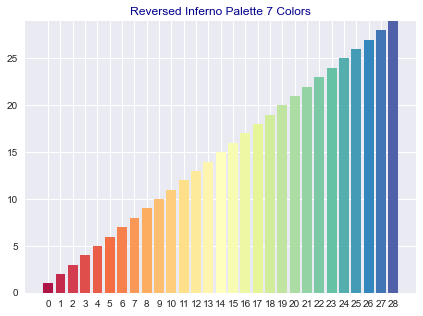

In [186]:
lst = unique

fig = plt.figure(figsize=(7,5))
axes = fig.add_subplot(1,1,1)
axes.set_ylim(0, len(lst))
plt.style.use("seaborn")


lst = [x+2 for x in lst]
palette = sns.color_palette("Spectral",len(lst))
#palette = sns.color_palette("inferno_r", 7)

print(palette)
plt.bar(range(len(lst)), sorted(lst), color=palette)
#tick_lst=["one", "two", "three", "four", "five", "six", "seven"]
plt.xticks(np.arange(len(lst)))
plt.title("Reversed Inferno Palette 7 Colors", color="darkblue")

In [193]:
#Intercambio de algunas etiquetas por parte de los pixeles
for j in range(0,sh[0]*sh[1]):
    aux = labels[j]
    
    #elijo un grupo próximo a la etiqueta '-1' que sea muy grande y lo mando a otra region de color
    if labels[j] == 0:
        aux = 35
    if labels[j] == 35:
        aux = 0
    #elijo la etiqueta de ruido (-1) y la intercambio con otra del final de la paleta
    if labels[j] == -1:
        aux = 75
    if labels[j] == 75:
        aux = -1
    
    labels[j] = aux

In [194]:
for i in range(0,sh[0]*sh[1]): 
    output_std[i,0] = round((np.array(palette[labels[i]+1])[0]) * 255.0)
    output_std[i,1] = round((np.array(palette[labels[i]+1])[1]) * 255.0)
    output_std[i,2] = round((np.array(palette[labels[i]+1])[2]) * 255.0)

(171, 414, 3)


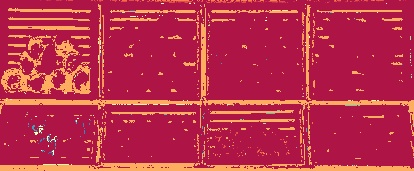

In [195]:
output_newshape = np.resize(output_std, sh)
print(output_newshape.shape)

cv2.imwrite('mercado_segmentado.jpg',cv2.cvtColor(output_newshape, cv2.COLOR_RGB2BGR)) 


Image(filename='mercado_segmentado.jpg') 

**Responde a las siguientes preguntas: (dando una explicación razonable)**
P1: Indica tu experiencia con el parámetro Epsilon a partir de tus resultados
P2: ¿Es/Sería posible que un pixel de pimiento y un pixel de un tomate pertenezcan al mismo cluster?

<font color='blue'>
    
P1: A mayor valor de $\epsilon$, mejores resultados hemos obtenido. El ruido se reduce más de la mitad para un valor de $\epsilon=4$ con respecto a $\epsilon=2$.

P2: Es posible que un pixel de pimiento y un pixel de tomate pertenezcan al mismo cluster (siempre que ambos sean del mismo color), ya que pertenecerán a un mismo grupo aquellos píxeles que tengan colores muy parecidos.
    
P3: En este caso ocure el mismo caso pero a la inversa que en el P1 y aque ahora domina mas el color "rojo" al estar mas a la "izquierda" de la gama cormatica es el que tiende a cojerse antes. 
</font>